<a href="https://colab.research.google.com/github/jamatamala/mec-mini-projects/blob/master/mec-5.3.10-data-wranging-with-pandas-mini-project/Mini_Project_Data_Wrangling_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
pd.__version__

'1.1.5'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [13]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [14]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [15]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [16]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [17]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [18]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [19]:
len(movies)

244914

### List all Batman movies ever made

In [21]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [22]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [23]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [24]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_potter_df.sort_values(by=['year'])
harry_potter_df

,title,year
50581,Harry Potter and the Order of the Phoenix,2007
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
109213,Harry Potter and the Half-Blood Prince,2009
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
187926,Harry Potter and the Goblet of Fire,2005
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [25]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [26]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [31]:
len(movies[(2000 <= movies.year) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [34]:
hamlet_df = movies[movies.title == 'Hamlet']
print('Total Movies Titled Hamlet:', len(hamlet_df))
hamlet_df

Total Movies Titled Hamlet: 20


,title,year
1931,Hamlet,2009
8214,Hamlet,1976
46344,Hamlet,1921
55639,Hamlet,2000
73869,Hamlet,1948
98326,Hamlet,1990
118535,Hamlet,1913
124506,Hamlet,1911
140203,Hamlet,1954
155004,Hamlet,1964


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [36]:
hamlet_df[hamlet_df.year >= 2000].sort_values(by='year', ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [48]:
inception_roles = cast[cast.title == 'Inception']
inception_roles[inception_roles.n.isnull()]

,title,year,name,type,character,n
98153,Inception,2010,Michael (III) August,actor,LAX Passenger,NaN
197877,Inception,2010,Ken Bhan,actor,Mombasan Gambler,NaN
374661,Inception,2010,John Ceallach,actor,LAX Passenger,NaN
497161,Inception,2010,Garvin Cross,actor,Snow Commander,NaN
684098,Inception,2010,Seve Esposito,actor,Italian Gambler,NaN
690634,Inception,2010,Marcus (II) Everett,actor,Stock Broker,NaN
707642,Inception,2010,Zachary Christopher Fay,actor,Extra,NaN
836295,Inception,2010,Daniel Girondeaud,actor,Bridge Sub Con,NaN
1006636,Inception,2010,Andrew Hoagland,actor,Pedestrian,NaN
1095095,Inception,2010,Charles Jarrell,actor,Hotel Guest,NaN


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [49]:
inception_roles[inception_roles.n.notnull()]

,title,year,name,type,character,n
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
260128,Inception,2010,Virgile Bramly,actor,Bridge Sub Con,29.0
326745,Inception,2010,Michael Caine,actor,Miles,11.0
333415,Inception,2010,Earl Cameron,actor,Elderly Bald Man,20.0
433867,Inception,2010,Nicolas Clerc,actor,Bridge Sub Con,26.0
444385,Inception,2010,Adam (IV) Cole,actor,Bar Sub Con,34.0
517227,Inception,2010,Jean-Michel Dagory,actor,Bridge Sub Con,30.0
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
709436,Inception,2010,Russ Fega,actor,Cab Driver,23.0


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [54]:
inception_roles[inception_roles.n.notnull()].iloc[:10].sort_values(by=['n'], ascending=True)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
326745,Inception,2010,Michael Caine,actor,Miles,11.0
333415,Inception,2010,Earl Cameron,actor,Elderly Bald Man,20.0
709436,Inception,2010,Russ Fega,actor,Cab Driver,23.0
433867,Inception,2010,Nicolas Clerc,actor,Bridge Sub Con,26.0
260128,Inception,2010,Virgile Bramly,actor,Bridge Sub Con,29.0
517227,Inception,2010,Jean-Michel Dagory,actor,Bridge Sub Con,30.0
444385,Inception,2010,Adam (IV) Cole,actor,Bar Sub Con,34.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [56]:
cast.title[cast.character == 'Albus Dumbledore']

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [60]:
cast.name[cast.character == 'Albus Dumbledore'].unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [61]:
len(cast[cast.name == 'Keanu Reeves'])

62

In [64]:
keanu_reeves_roles = cast[cast.name == 'Keanu Reeves']
keanu_reeves_roles[(keanu_reeves_roles.n.notnull()) & (keanu_reeves_roles.year >= 1999)].sort_values(by='year')

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [65]:
cast[(cast.year >= 1950) & (cast.year <= 1960)]

,title,year,name,type,character,n
66,Fire Down Below,1957,'Stretch' Cox Troupe,actor,Limbo Dance by,20.0
67,De zaak M.P.,1960,Frans 't Hoen,actor,Hollandse boer,29.0
68,Dorp aan de rivier,1958,Frans 't Hoen,actor,Dirk Jan,15.0
111,Ci sposeremo a Capri,1956,Quartetto 2+2,actor,Themselves,19.0
116,Thunder in Carolina,1960,2nd Marine Division Band,actor,Themselves,NaN
...,...,...,...,...,...,...
3786059,Styrmand Karlsen,1958,Clara ?st?,actress,The Queen,9.0
3786061,Tre piger fra Jylland,1957,Clara ?st?,actress,Frk. Lind,9.0
3786075,Toya,1956,Aslaug ?ye,actress,moren til Trygve,19.0
3786083,Venner,1960,Bibba ?ygard,actress,Kontordame,NaN


In [66]:
cast[(cast.year >= 2007) & (cast.year <= 2017)]

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
...,...,...,...,...,...,...
3786159,Eldfjall,2011,Katla M. ?orgeirsd?ttir,actress,Home Nurse,NaN
3786160,Svanurinn,2017,Katla M. ?orgeirsd?ttir,actress,?l?f,NaN
3786166,Foreldrar,2007,Lilja Gu?r?n ?orvaldsd?ttir,actress,Katrin Eldri,NaN
3786167,Rokland,2011,Lilja Gu?r?n ?orvaldsd?ttir,actress,A?albj?rg - Dagga's Mother,NaN


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [69]:
cast[(cast.year >= 2000) & (cast.n == 1)]

,title,year,name,type,character,n
102,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
138,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
144,Freelancers,2012,50 Cent,actor,Malo,1.0
145,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
146,Gun,2010,50 Cent,actor,Rich,1.0
...,...,...,...,...,...,...
3785795,120,2008,?zge ?zberk,actress,M?nire,1.0
3785893,6A,2016,Emine ?zkan,actress,Denise,1.0
3785961,Kadife,2012,Ayta? ?ztuna,actress,Kadife Ana,1.0
3786008,Dig og mig,2008,Julie R. ?lgaard,actress,Stephanie,1.0


In [70]:
cast[(cast.year >= 2000) & (cast.n.notnull()) & (cast.n > 1)]

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
...,...,...,...,...,...,...
3786163,Beowulf & Grendel,2005,Steinunn ?l?na ?orsteinsd?ttir,actress,Wealtheow,15.0
3786164,Eden,2018,Steinunn ?l?na ?orsteinsd?ttir,actress,M??ir Viggu,8.0
3786169,Niceland (Population. 1.000.002),2004,Steinunn ?orvaldsd?ttir,actress,Factory Worker,21.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0


In [71]:
cast[(cast.year >= 2000) & (cast.n.isnull())]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
...,...,...,...,...,...,...
3786159,Eldfjall,2011,Katla M. ?orgeirsd?ttir,actress,Home Nurse,NaN
3786160,Svanurinn,2017,Katla M. ?orgeirsd?ttir,actress,?l?f,NaN
3786166,Foreldrar,2007,Lilja Gu?r?n ?orvaldsd?ttir,actress,Katrin Eldri,NaN
3786167,Rokland,2011,Lilja Gu?r?n ?orvaldsd?ttir,actress,A?albj?rg - Dagga's Mother,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [72]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

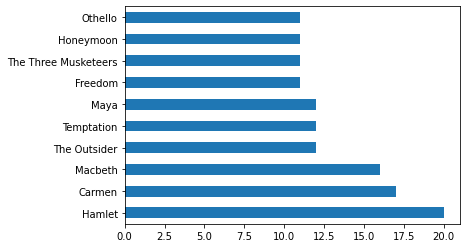

In [73]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [78]:
movies_2000 = movies[movies.year >= 2000]
movies_2000.year.value_counts()[:10]

2017    11474
2016     9440
2015     8702
2014     8264
2018     8041
2013     7896
2012     7398
2011     6988
2010     6415
2009     6125
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

Text(0, 0.5, 'Number of releases')

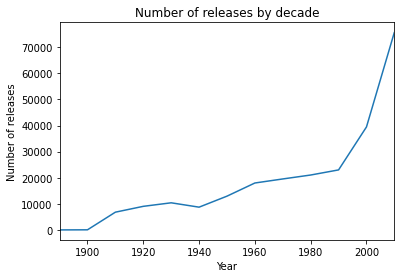

In [90]:
movies_by_decade = movies.groupby((movies.year//10)*10).count()
movies_by_decade['title'].plot()
plt.xlim([1890, 2010])
plt.title('Number of releases by decade')
plt.xlabel('Year')
plt.ylabel('Number of releases')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [100]:
character_names = cast.groupby('character').count()
character_names.sort_values(by='title', ascending=False).iloc[:10].index.tolist()

['Himself',
 'Dancer',
 'Extra',
 'Reporter',
 'Student',
 'Doctor',
 'Party Guest',
 'Policeman',
 'Nurse',
 'Bartender']

In [98]:
character_herself = cast[cast.character == 'Herself'].groupby('name').count()
character_herself.sort_values(by='title', ascending=False).iloc[:10].index.tolist()

['Queen Elizabeth II',
 'Joyce Brothers',
 'Luisa Horga',
 'Mar?a Luisa (V) Mart?n',
 'Hillary Clinton',
 'Margaret Thatcher',
 'In?s J. Southern',
 'Marta Berrocal',
 'Oprah Winfrey',
 'Marilyn Monroe']

In [101]:
character_himself = cast[cast.character == 'Himself'].groupby('name').count()
character_himself.sort_values(by='title', ascending=False).iloc[:10].index.tolist()

['Adolf Hitler',
 'Richard Nixon',
 'Ronald Reagan',
 'John F. Kennedy',
 'George W. Bush',
 'Winston Churchill',
 'Martin Luther King',
 'Bill Clinton',
 'Ron Jeremy',
 'Franklin D. Roosevelt']

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [114]:
cast[cast.character.str.startswith('Zombie')].character.value_counts().head(10)

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [115]:
cast[cast.character.str.startswith('Police')].character.value_counts().head(10)

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

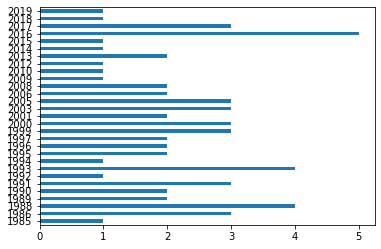

In [116]:
cast[cast.name=='Keanu Reeves'].year.value_counts().sort_index().plot(kind='barh')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


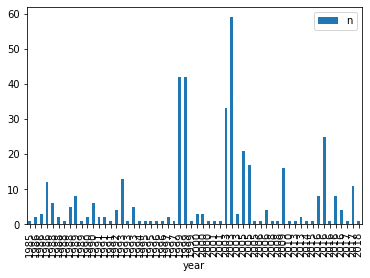

In [118]:
keanu_reeves_cast = cast[(cast.name == 'Keanu Reeves') & (pd.notnull(cast.n))][['year', 'n']].sort_values('year')
keanu_reeves_cast.plot(x='year', y='n', kind='bar')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

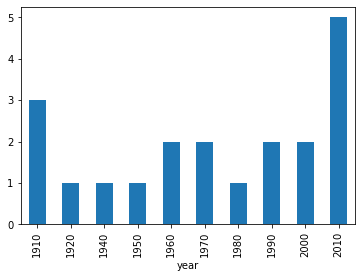

In [119]:
hamlet = (movies[movies.title == 'Hamlet']
          .groupby(movies.year // 10 * 10)
          .count()
          .rename({'title': 'count'}, axis=1))['count']
hamlet.plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [120]:
(cast[(cast.year.between(1960, 1969)) & (cast.n == 1)]
.groupby(['year', 'type'])
.count()[['title']]
.rename({'title': 'count'}, axis=1))

count
year type          
1960 actor      733
     actress    302
1961 actor      761
     actress    327
1962 actor      782
     actress    299
1963 actor      714
     actress    336
1964 actor      823
     actress    313
1965 actor      862
     actress    340
1966 actor      900
     actress    358
1967 actor      874
     actress    402
1968 actor      920
     actress    407
1969 actor      951
     actress    419

In [121]:
(cast[(cast.year.between(2000, 2009)) & (cast.n == 1)]
.groupby(['year', 'type'])
.count()[['title']]
.rename({'title': 'count'}, axis=1))

count
year type          
2000 actor     1440
     actress    593
2001 actor     1462
     actress    633
2002 actor     1551
     actress    662
2003 actor     1540
     actress    662
2004 actor     1706
     actress    685
2005 actor     1836
     actress    787
2006 actor     2001
     actress    881
2007 actor     2145
     actress    819
2008 actor     2285
     actress    971
2009 actor     2591
     actress   1094

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [125]:
frank_oz = (cast[cast.name == 'Frank Oz']
         .groupby(['year', 'title'])
         .count()[['name']]
         .rename({'name': 'freq'}, axis=1)
         .sort_values(by=['year'], ascending=True))
frank_oz[frank_oz.freq > 1]

freq
year title                                     
1979 The Muppet Movie                         8
1981 An American Werewolf in London           2
     The Great Muppet Caper                   6
1982 The Dark Crystal                         2
1984 The Muppets Take Manhattan               7
1985 Follow That Bird                         3
1992 The Muppet Christmas Carol               7
1996 Muppet Treasure Island                   4
1999 Muppets from Space                       4
     The Adventures of Elmo in Grouchland     3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [126]:
frank_oz = (cast[cast.name == 'Frank Oz']
         .groupby(['character'])
         .count()[['name']]
         .rename({'name': 'freq'}, axis=1)
         .sort_values(by=['freq'], ascending=False))
frank_oz[frank_oz.freq > 1]

,freq
character,
Animal,6
Miss Piggy,6
Yoda,6
Cookie Monster,5
Sam the Eagle,5
Fozzie Bear,4
Bert,3
Grover,2


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

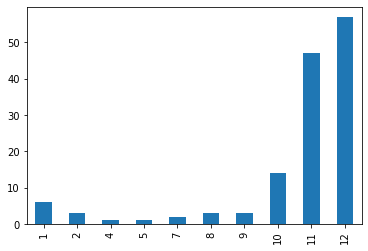

In [127]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

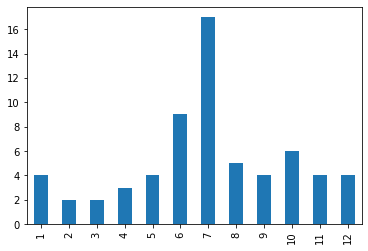

In [128]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


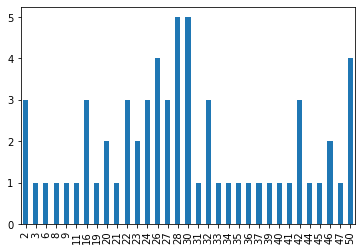

In [129]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
summer.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [130]:
us_releases = release_dates[release_dates.country == 'USA']
keanu_reaves = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1)]
(keanu_reaves.merge(us_releases, how='inner', on=['title', 'year'])
      .sort_values('date')) 

,title,year,name,type,character,n,country,date
20,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
3,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
12,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
13,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
10,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
1,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
4,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
6,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
17,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

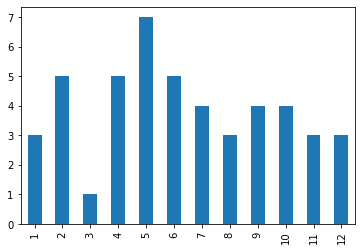

In [133]:
us_releases = release_dates[release_dates.country == 'USA']
keanu_reeves = cast[(cast.name == 'Keanu Reeves')]
keanu_reeves  = (keanu_reeves.merge(us_releases, how='inner', on=['title', 'year'])
              .sort_values('date'))
keanu_reeves .date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

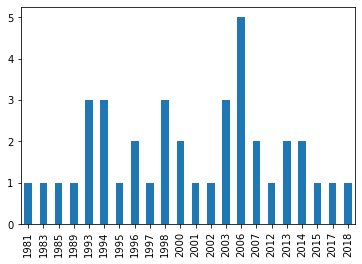

In [131]:
us_releases = release_dates[release_dates.country == 'USA']
ian_mckellen = cast[(cast.name == 'Ian McKellen')]
ian_mckellen = (ian_mckellen.merge(us_releases, how='inner', on=['title', 'year'])
              .sort_values('date'))
ian_mckellen.date.dt.year.value_counts().sort_index().plot(kind='bar')